## Install required libraries

In [ ]:
!pip install matplotlib | tail -n 1
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

## Import required libraries

In [3]:
# Import required libralies
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import display
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot

## Change settings

In [4]:
# Change default font size
plt.rcParams['font.size'] = 14

# Change default graph size
plt.rcParams['figure.figsize'] = (6, 6)

# Square indicate ON
plt.rcParams['axes.grid'] = True

## Prepare for the dataset

In [8]:
from sklearn.datasets import load_iris

# Load the data
iris = load_iris()

# Get input and correct data
x_org = iris.data
y_org = iris.target

In [ ]:
# Data filtering
# Only sepal_length and sepal_width
x_data = iris.data[:100,:2]
y_data = iris.target[:100]

## Splitting training data and validation data

In [10]:
# Shuffle also implemented
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(
    x_data, y_data, train_size=70, test_size=30,
    random_state=123)

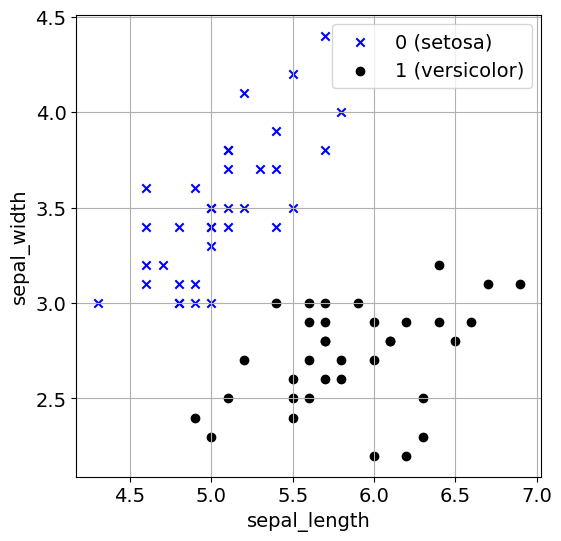

In [11]:
# Display scatter plot
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', c='b', label='0 (setosa)')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='o', c='k', label='1 (versicolor)')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

## Define the class of the prediction model

In [17]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)
        self.sigmoid = nn.Sigmoid()

        # Initialize weight and bias values to 1.0
        self.l1.weight.data.fill_(1.0)
        self.l1.bias.data.fill_(1.0)

    # Difine the prediction function
    def forward(self, x):
        x1 = self.l1(x) # Calculate linear function
        return x1

## Prepare the inputs and labels

In [18]:
# Dimension of input
n_input= x_train.shape[1]

# Dimension of output
n_output = 1

In [19]:
# Learning rate
lr = 0.01

# Create predict function
net = Net(n_input, n_output)

# Create loss function
# Reason for using the loss function: Calculating exponential and logarithmic
# functions independently tends to produce unstable results.
criterion = nn.BCEWithLogitsLoss()

# Create Optimization function
optimizer = optim.SGD(net.parameters(), lr=lr)

# Repetition counts
num_epochs = 10000

# Record evaluation results
history = np.zeros((0,5))


# Tensor Variabilization
inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).float()
inputs_valid = torch.tensor(x_valid).float()
labels_valid = torch.tensor(y_valid).float()

# Transform labels variable to (N, 1) dimension
labels1 = labels.view((-1, 1))
labels1_valid = labels_valid.view((-1,1))

## Execute binary classification

In [ ]:
for epoch in range(num_epochs):
    # Training phase

    # Initialize gradient
    optimizer.zero_grad()

    # 1. Calculate prediction
    outputs = net(inputs)

    # 2. Calculate loss
    loss = criterion(outputs, labels1)

    # 3. Calculate gradient
    loss.backward()

    # 4. Adjust parameters
    optimizer.step()

    # Save the traning loss data
    train_loss = loss.item()

    # Calculate the prediction label (1 or 0)
    # The threash hold is 0.0
    predicted = torch.where(outputs < 0.0, 0, 1)

    # Calculate accuracy
    train_acc = (predicted == labels1).sum() / len(y_train)


    # Prediction phase

    # 1. Calculate prediction
    outputs_valid = net(inputs_valid)

    # 2. Calculate loss
    loss_valid = criterion(outputs_valid, labels1_valid)

    # Save the valid loss data
    val_loss =  loss_valid.item()

    # Calculate the prediction label (1 or 0)
    # The threash hold is 0.0
    predicted_valid = torch.where(outputs_valid < 0.0, 0, 1)

    # Calculate accuracy
    val_acc = (predicted_valid == labels1_valid).sum() / len(y_valid)

    if ( epoch % 10 == 0):
        print (f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

## Confirm the loss values and accuracies

In [21]:
# Print initial and final values of the loss and accuracy
print(f'Initial: Loss: {history[0,3]:.5f} Accuracy: {history[0,4]:.5f}' )
print(f'Final: Loss: {history[-1,3]:.5f} Accuracy: {history[-1,4]:.5f}' )

Initial: Loss: 4.49384 Accuracy: 0.50000
Final: Loss: 0.15395 Accuracy: 0.96667


## Display the learning curve for the loss

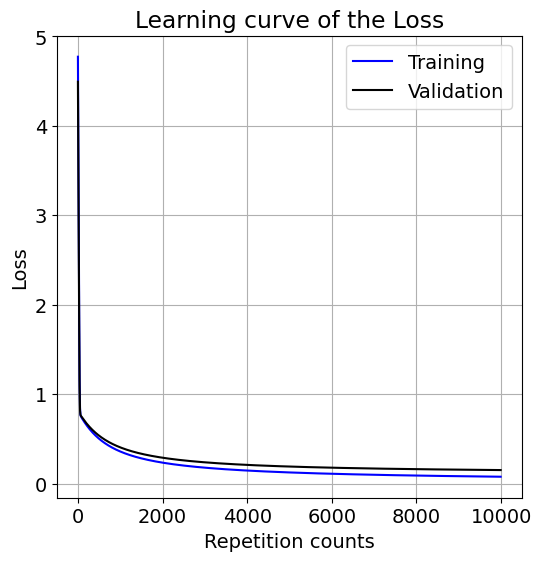

In [22]:
plt.plot(history[:,0], history[:,1], 'b', label='Training')
plt.plot(history[:,0], history[:,3], 'k', label='Validation')
plt.xlabel('Repetition counts')
plt.ylabel('Loss')
plt.title('Learning curve of the Loss')
plt.legend()
plt.show()

## Display learning curve for the accuracy

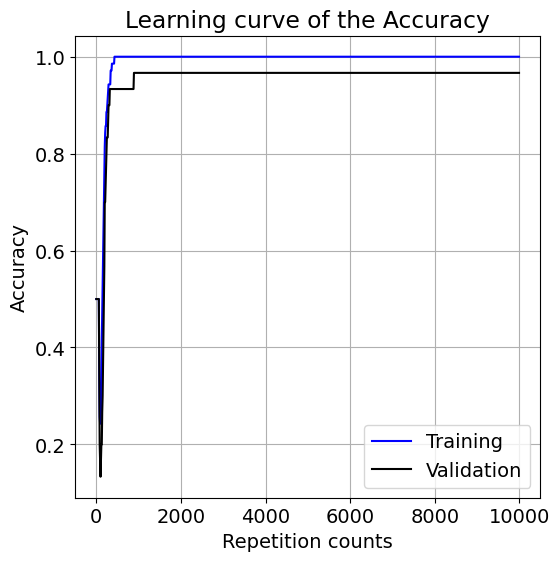

In [23]:
plt.plot(history[:,0], history[:,2], 'b', label='Training')
plt.plot(history[:,0], history[:,4], 'k', label='Validation')
plt.xlabel('Repetition counts')
plt.ylabel('Accuracy')
plt.title('Learning curve of the Accuracy')
plt.legend()
plt.show()